<h1 style='text-align:center;'>Lending club case study</h1>

Importing the numpy and pandas libraries:

In [842]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from scipy import stats
%matplotlib inline


Loading the loan.csv file:

In [843]:
loan = pd.read_csv('loan.csv',low_memory=False)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [844]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [845]:
loan.shape

(39717, 111)

In [846]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [847]:
loan= loan[loan.isnull().sum(axis=1) != 64]
print(loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


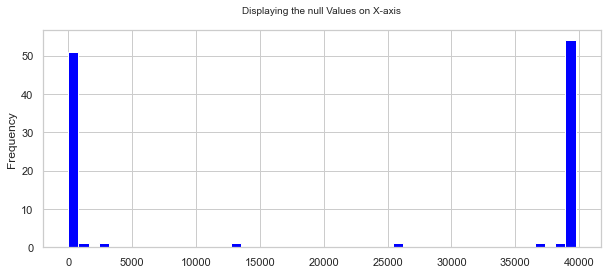

In [848]:
c = loan.isnull().sum()
plt.title("Displaying the null Values on X-axis\n",fontdict={"fontsize":10})
c.plot(kind='hist', bins=50, figsize = (10,4),color='blue')
plt.show()

In [849]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

Dropping the columns which have null values more than 10,000

In [850]:
loan.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

In [851]:
unique_col=loan.nunique()
print(unique_col)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

Some of the columns are not needed and can be removed, the below are the ones are those which are being removed:

In [852]:
columns_remove = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=columns_remove, inplace=True)
loan.shape

(39717, 37)

In [853]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Dropping the Current status as it donot give information of defaulters.

In [854]:
loan_index = loan[ loan['loan_status'] == 'Current' ].index
loan.drop(loan_index, inplace = True)
loan.shape

(38577, 37)

In [855]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Remove '%' symbol from int_rate column:

In [856]:
loan['int_rate'] = list(map(lambda x: x[:-1], loan['int_rate'].values))
loan['int_rate'] = [float(x) for x in loan['int_rate'].values]
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

<AxesSubplot:>

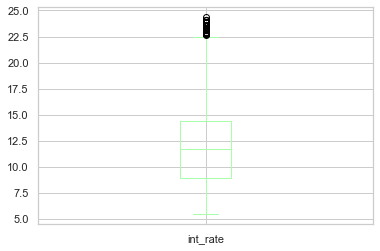

In [857]:
loan['int_rate'].plot.box()

In [858]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [859]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [860]:
month, year = loan['issue_d'].str.split('-').str
year.value_counts()

C:\Users\03602Q~1\AppData\Local\Temp/ipykernel_33436/92194699.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  month, year = loan['issue_d'].str.split('-').str


11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

Separating the month and year values

In [861]:
month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

In [862]:
loan['issued_year'] = pd.to_numeric(year)
loan['issued_month'] = month

In [863]:
loan.drop(columns=['issue_d'], inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,issued_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec


In [864]:
loan['title'].sample(10)

7768         Debt Consolidation 
26481                Payoff Loan
10921            Home improvment
17361         Credit Card Payoff
6270     Debt Consolidation Loan
18739         Debt Consolidation
31666                 Chase Card
15275              Personal Loan
17650           swift motorcycle
37699              consolidation
Name: title, dtype: object

Seperating the month and date in the earliest_cr_line column:

In [865]:
month_cr, year_cr = loan['earliest_cr_line'].str.split('-').str
year_cr.value_counts()

C:\Users\03602Q~1\AppData\Local\Temp/ipykernel_33436/2487804375.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  month_cr, year_cr = loan['earliest_cr_line'].str.split('-').str


00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

Extracted month and year values.

In [866]:
month_cr.value_counts()

Oct    3967
Dec    3951
Nov    3811
Sep    3505
Jan    3331
Aug    3213
Jul    2967
Jun    2863
May    2825
Feb    2783
Mar    2715
Apr    2646
Name: earliest_cr_line, dtype: int64

In [867]:
loan['year_cr'] = pd.to_numeric(year_cr)
loan['month_cr'] = month_cr
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,issued_month,year_cr,month_cr
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec,85,Jan
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec,99,Apr
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec,1,Nov
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec,96,Feb
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec,4,Nov


Removing % from column revol_util:

In [868]:
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [869]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 385

In [870]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,year_cr
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,...,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,...,22.052648,0.0,1.0,0.0,0.0,0.0,0.043479,0.0,10.309070,58.955440
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,...,11.425861,0.0,0.0,0.0,0.0,0.0,0.204583,0.0,0.882658,44.003823
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,7.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,...,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,10.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,...,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,11.000000,89.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,...,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,11.000000,96.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,11.000000,99.000000


In [871]:
loan.groupby(['loan_status']).count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,issued_month,year_cr,month_cr
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5143,5399,...,5627,5627,5621,5627,5509,5626,5627,5627,5627,5627
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,31048,32145,...,32950,32950,32900,32950,32371,32912,32950,32950,32950,32950


In [872]:
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent.head()

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [873]:
loan['loan_status_numerical'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,issued_month,year_cr,month_cr,loan_status_numerical
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,0.0,0,0.0,0.0,11,Dec,85,Jan,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,0.0,0,0.0,0.0,11,Dec,99,Apr,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,0.0,0,0.0,0.0,11,Dec,1,Nov,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,0.0,0,0.0,0.0,11,Dec,96,Feb,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,0.0,0,0.0,0.0,11,Dec,4,Nov,0


The data is cleaned and next to start with EDA.

# EDA

Univariate analysis

In [874]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [875]:
loan['loan_amnt_catergorical'] = loan['loan_amnt'].astype(int)

In [876]:

def category (x):
    if x <= 5300:
        return "Low"
    elif x >5300 and x<=9600:
        return "Medium"
    elif x >9600 and x<=15000:
        return "High"
    else:
        return "Higher"  ""
   

Defined the loan amount into categories in order to represnt it on the graph.

In [877]:
loan['loan_amnt_catergorical'] = loan["loan_amnt"].apply (lambda x : category(x))
#loan['loan_amnt'].sample(10)

Text(0.5, 1.0, 'Displaying loan amount category \n')

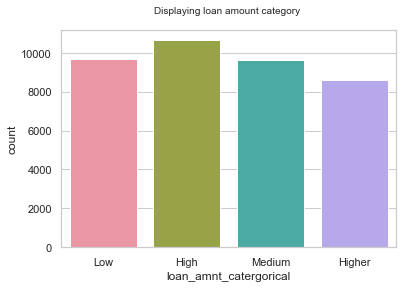

In [878]:
sns.countplot( x="loan_amnt_catergorical", data=loan)
plt.title("Displaying loan amount category \n",fontdict={"fontsize":10})
#ax = sns.countplot(y=category["loan"])
#ax = seaborn.boxplot(y=transac['TOT_SALES'])

Majority of the Loan amount lies in the High range category

In [879]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 385

In [880]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [881]:
loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [882]:
loan['dti_categorical'] = loan['dti'].astype(float)

In [883]:
def category_dti(x):
    if x >= 0 and x<=8:
        return "Low"
    elif x >8 and x<=14:
        return "Medium"
    #elif x >14 and x<=18:
     #   return "High"
    else:
        return "Higher"

In [884]:
loan['dti_categorical'] = loan['dti'].apply (lambda x : category_dti(x))

Text(0.5, 1.0, 'Displaying debt to income ratio category \n')

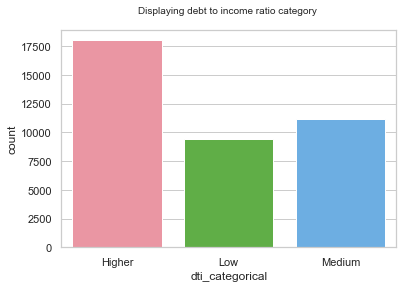

In [885]:
sns.countplot( x="dti_categorical", data=loan)
plt.title("Displaying debt to income ratio category \n",fontdict={"fontsize":10})

Majority of dti lies in high category.

In [886]:
loan['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [887]:
loan['installment_categorical'] = loan['installment'].astype(float)

In [888]:
def installment_cat(x):
    if x >= 15 and x<=166:
        return "Low"
    elif x >166 and x<=322:
        return "Medium"
    elif x >322 and x<=425:
        return "High"
    else:
        return "Higher"

In [889]:
loan['installment_categorical'] = loan['installment'].apply (lambda x : installment_cat(x))

Text(0.5, 1.0, 'Displaying Installment category \n')

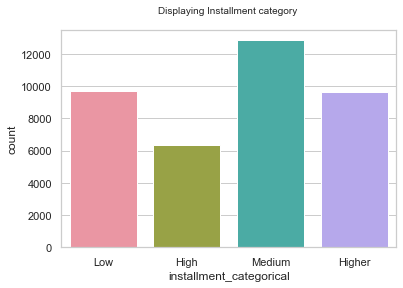

In [890]:
sns.countplot( x="installment_categorical", data=loan)
plt.title("Displaying Installment category \n",fontdict={"fontsize":10})


Majority of Installment lies in low category.

# Bivariate analysis

In [891]:
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']

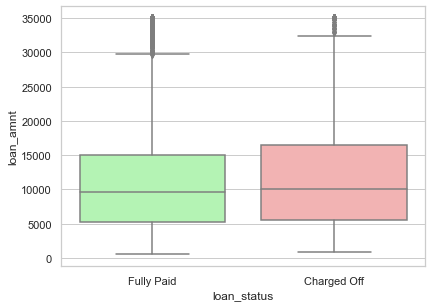

In [892]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,3)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [893]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

since we see there is considerable difference between mean and median . let us limit our data less than or equal to 75%

In [894]:
loan_below75 = loan.loc[(loan['loan_amnt']<=15000)]

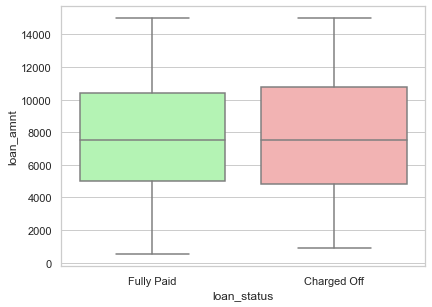

In [895]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,3)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_below75)
plt.show()

Data more than to 75%

In [896]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]

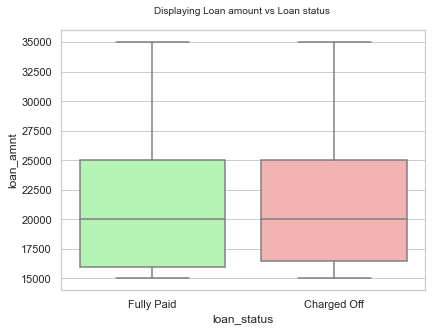

In [897]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,2)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.title("Displaying Loan amount vs Loan status \n",fontdict={"fontsize":10})
plt.show()

From above box plot the higher the loan amount higher the loan might get charged off.

In [898]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [899]:
loan['int_rate_cat'] = loan['int_rate'].astype(float)

def category_int_rate(x):
    if x >= 5.42 and x<8.94:
        return "Low"
    elif x >8.94 and x<=11.93:
        return "Medium"
    elif x >11.93 and x<=14.38:
        return "High"
    else:
        return "Higher"

loan['int_rate_cat'] = loan['int_rate'].apply (lambda x : category_int_rate(x))		

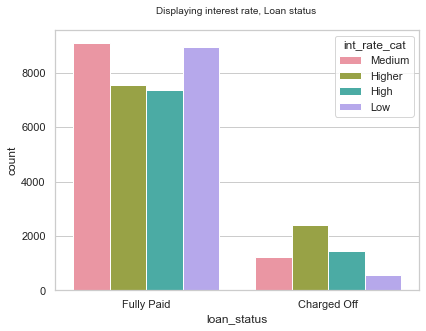

In [900]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,2)
sns.countplot(x = 'loan_status', hue = 'int_rate_cat', data = loan)
plt.title("Displaying interest rate, Loan status \n",fontdict={"fontsize":10})
plt.show()

Higher the interest rate, higher they are charged off

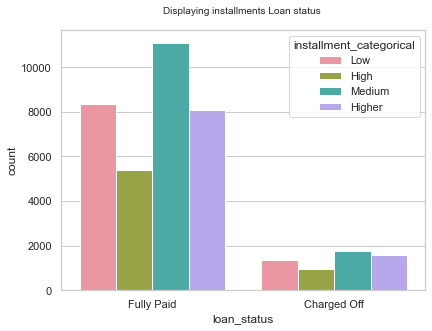

In [901]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,2)
sns.countplot(x = 'loan_status', hue = 'installment_categorical', data = loan)
plt.title("Displaying installments Loan status \n",fontdict={"fontsize":10})
plt.show()

Higher the loan amount higher the chances of charged off.

In [902]:
loan['annual_inc_categorical'] = loan['annual_inc'].astype(float)

def category_annual_inc(x):
    if x >= 4000 and x<20000:
        return "Low"
    elif x >20001 and x<=40000:
        return "Medium"
    elif x >40001 and x<=82000:
        return "High"
    else:
        return "Higher"

loan['annual_inc_categorical'] = loan['annual_inc'].apply (lambda x : category_annual_inc(x))


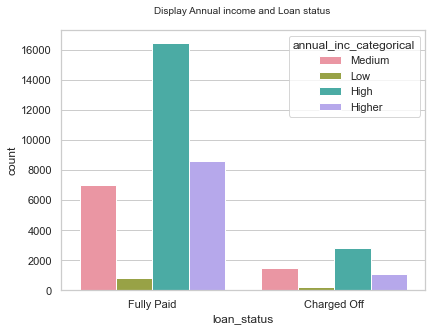

In [903]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,2)
sns.countplot(x = 'loan_status', hue = 'annual_inc_categorical', data = loan)
plt.title("Display Annual income and Loan status \n",fontdict={"fontsize":10})
plt.show()

High and higher the income,
higher the repayment.

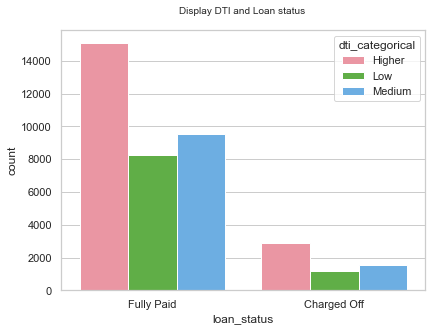

In [904]:
plt.figure(figsize=(30, 22))
plt.subplot(4,4,2)
sns.countplot(x = 'loan_status', hue = 'dti_categorical', data = loan)
plt.title("Display DTI and Loan status \n",fontdict={"fontsize":10})
plt.show()

higher the DTI ( debt to income ratio) will lead to higher charged off rate.

We can conclude the below points:

below are some of the drivers for loan default. Apart from these, I am sure there will be multiple others too; however, according to me, these are the most impactful ones.

1. Higher the interest higher the Charge off ratio.
2. Higher the DTI ( debt to income ratio) will lead to higher charged off rate.
3. High income individuals has high repayment rate.
4. High and higher the income, higher the repayment.